In [275]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [276]:
#reading train and test files

df_train= pd.read_csv("C:\\Users\\Anand G\\Desktop\\Janani\\DATA SCIENCE\\house-prices-advanced-regression-techniques\\train.csv")
df_test= pd.read_csv("C:\\Users\\Anand G\\Desktop\\Janani\\DATA SCIENCE\\house-prices-advanced-regression-techniques\\test.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [277]:
df_train.shape, df_test.shape

#sale price is the prediction value

((1460, 81), (1459, 80))

In [278]:
y = df_train['SalePrice']
df_train.drop(columns =['SalePrice'],axis =1,inplace=True)


In [279]:
#adding source column for the dataset

df_train['Source'] = 'Train'
df_test['Source'] ='Test'

#merging the train and test

df=df_train.append(df_test)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,Test
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,Test
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,Test
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,Test


In [280]:
#finding missing values

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

<AxesSubplot:>

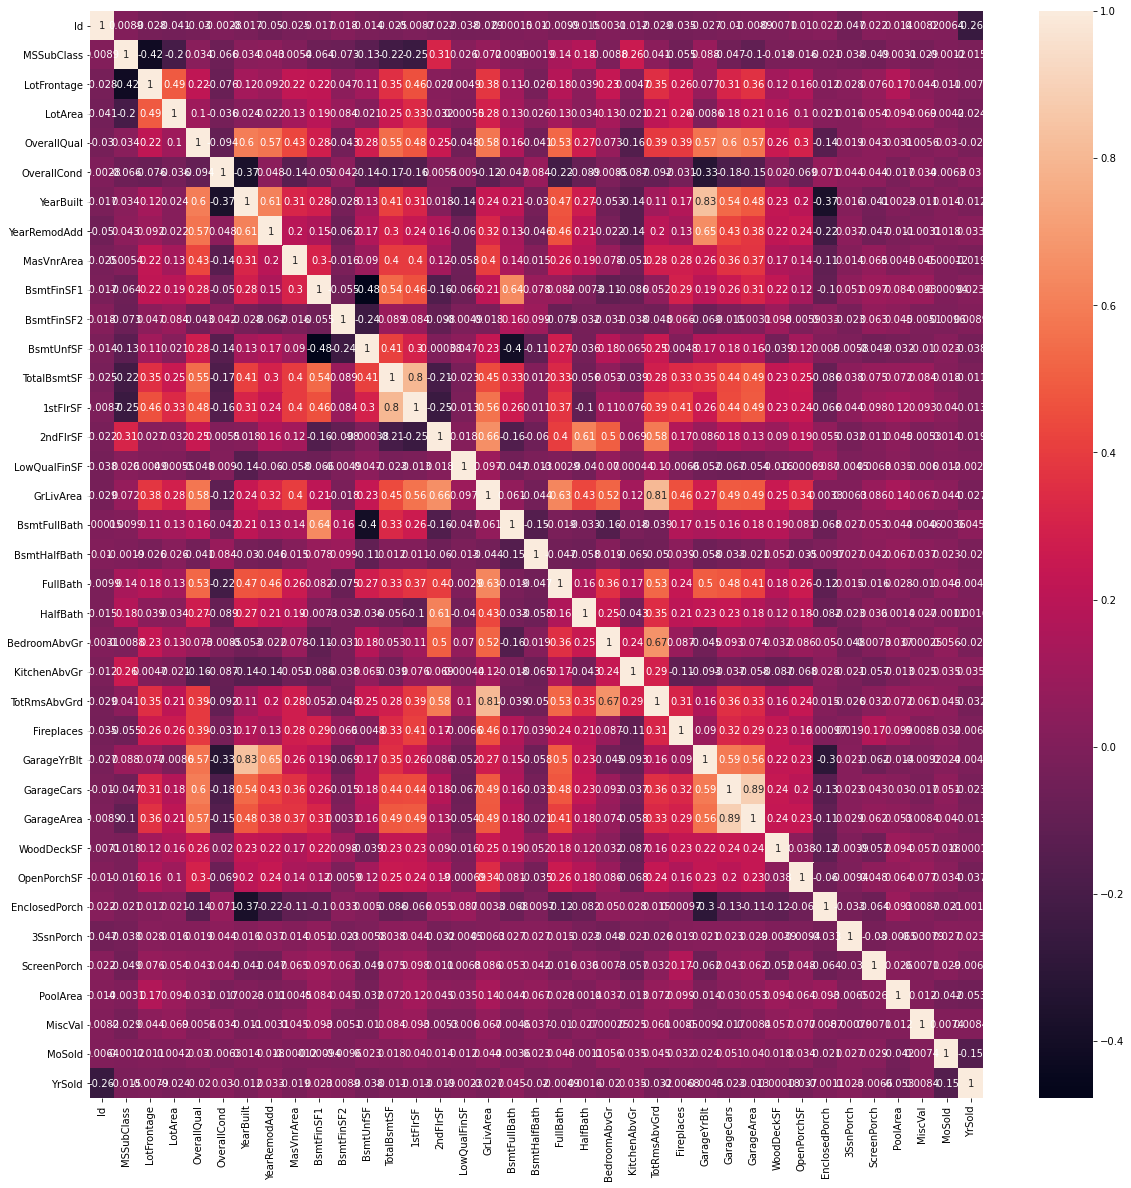

In [281]:
plt.figure(figsize =(20,20))
sns.heatmap(df.corr(),annot=True)

In [282]:
#dropping alley as there is so much NaN
df.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','YrSold','Id','MoSold','MiscVal','PoolArea','ScreenPorch','3SsnPorch'],axis =1, inplace =True)
    

In [283]:
#diving numberical and categorial columns
num=df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude ='number').drop(columns=['Source'])

In [286]:
#filling values
for i in cat:
  df[i] = df[i].fillna(df[i].mode()[0])

for i in num:
  df[i] = df[i].fillna(df[i].mean())

In [288]:
# dropping and encoding
df = pd.get_dummies(df.select_dtypes(exclude='number'),drop_first=True)

In [290]:
df.shape

(2919, 197)

In [309]:
train = df.loc[df['Source_Train']==1]
test = df.loc[df['Source_Train']!=1]

In [311]:
train.shape,test.shape

((1460, 197), (1459, 197))

In [191]:
train = df.loc[df['Source']=='Train']
test = df.loc[df['Source']=='Test']

train.drop(columns=['Source'],axis=1,inplace=True)

test.drop(columns=['Source'],axis=1,inplace=True)

C:\Users\Anand G\anaconda3\ANACONDA3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Modeling

In [312]:
model = LinearRegression()


In [314]:
model.fit(train,y)

LinearRegression()

In [334]:
y_test = model.predict(test)

In [335]:
y_test

array([114774.66358675, 159592.26347436, 178784.94228226, ...,
       113261.69666508, 110807.07323404, 189756.5435047 ])

In [317]:
model.score(train,y)

0.8431508879775553

In [318]:
model.score(test,y_test)

1.0

In [342]:

df_test= pd.read_csv("C:\\Users\\Anand G\\Desktop\\Janani\\DATA SCIENCE\\house-prices-advanced-regression-techniques\\test.csv")
Id = df_test['Id']

In [340]:
result =pd.DataFrame()

In [346]:
result['Id'] = Id
result['SalePrice'] = y_test

In [353]:
result

,Id,SalePrice
0,1461,114774.663587
1,1462,159592.263474
2,1463,178784.942282
3,1464,197022.272646
4,1465,194796.254787
...,...,...
1454,2915,85090.099940
1455,2916,80763.042116
1456,2917,113261.696665
1457,2918,110807.073234


In [355]:
result.to_csv('submission.csv', index = False)